<div style="background-color: #323031; padding:30px; color:#ffffff; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">

# Python for Accounting - Session 1

&nbsp;

Welcome to the Python for Accounting practical sessions. 

This series of practical sessions consists of three separate sessions, that will teach you to work with stock data and financial documents in Python. 

In the 1st session, we will practice with pandas before working with stock price data in the 2nd and 3rd session. You will work with the ebay-kleinanzeigen data from the guided project on Dataquest. Please follow the exercises in this notebook and not on Dataquest as we modified the tasks.

<div  style="color:#1b1b1b; padding:30px; background-color:#f2f2f2; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
    
### What you will learn in this session

This workshop will teach you to:
- import datasets with non-UTF encoding
- rename columns
- explore column values
- remove outliers/invalid values
- calculate aggregate values for different subsets

<b>What to do when getting stuck</b>:
    <ol>
        <li>Ask the trainer if you struggle to find a solution.</li>
        <li>Search online:</li>
        <ol>
            <li>The answer box on the top of Google's results page</li>
            <li><a href="https://www.stackoverflow.com">stackoverflow.com</a> (task-specific solutions)</li>
            <li><a href="https://www.w3schools.com">w3schools.com</a> (basic python questions)</li>
            <li><a href="https://www.realpython.com">realpython.com</a> (topic-based tutorials)</li>
        </ol>
    </ol>

<br>

### Using your own laptop

1. Open the Anaconda prompt. Open the search bar (Windows-key or Cmd+Space) and type in Anaconda prompt.
2. Type jupyter lab and hit Enter.
3. In the jupyter lab app, select the folder from the menu on the left side where you downloaded the notebook.
4. Double-click on the notebook to open it.

If you are using your own laptop and haven't been able to install Anaconda, you will have to use Google Colab (see below).

### Using Google Colab

1. Open the [google colab](https://colab.research.google.com/) website.
2. Select Upload and select the notebook from your harddrive.


### Opening the jupyter notebook

To open the jupyter notebook, you will need to launch the **jupyter lab app**.

1. Open the Anaconda prompt (Click the Windows key and type in Anaconda Prompt and hit Enter).
2. Switch to the H-drive by typing in H: and hit Enter.
3. Type in jupyter lab and hit Enter.
4. In the jupyter lab app, select the folder from the menu on the left side where you downloaded the notebook.
5. Double-click on the notebook to open it.




<img src="https://www.volkswagenag.com/presence/stories/2019/10/die-glorreichen-sieben/Golf-2-front.jpg">

# Introduction to project and dataset

In this guided project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classified German version of Ebay similar to the British website Gumtree.

The dataset was originally scraped and uploaded to Kaggle by user orgesleka. The original dataset isn't available on Kaggle anymore, but you can find it [here](https://raw.githubusercontent.com/mwiemers/datasets/main/autos.csv).

This dataset is a modification of the [original dataset](https://data.world/data-society/used-cars-data), which is larger and tidier.

The version we will be working with has 50,000 data points from the full dataset and is less tidy to more closely resemble what you would expect from a scraped dataset.

<br>


---


<br>

### Task 1: Import data

1. Import the pandas and NumPy libraries
2. Read the autos.csv CSV file into pandas using the provided `url`. Assign it to the variable name autos. The file is ~ 50MB and might take a few seconds to load.
3. Calculate the number of missing values per column. You can do this using the `.isnull()` method in combindation with the `.mean()` method. First use the `.isnull()` on the `autos` dataframe and observe the output. How can you apply the mean method to get the percentage of missings per column? 

In [1]:
import pandas as pd
import numpy as np

url = "https://drive.google.com/uc?export=download&id=1-3h2uJoPTfZc5d9_3clY_A8RZw46jIQ6"

autos = pd.read_csv(url)

autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-28 19:58:25,Skoda_Octavia_1.9_TDI_Combi_Laurin_&_Klement,private,Angebot,"€2,250",control,estate,2001,manual,110,octavia,"150,000km",9,diesel,skoda,no,2016-03-28 00:00:00,0,90441,2016-03-28 20:41:25
1,2016-03-15 19:49:03,Opel_Agila_1.2_16_V,private,Angebot,€550,control,hatchback,2001,manual,75,agila,"150,000km",9,petrol,opel,yes,2016-03-15 00:00:00,0,26683,2016-03-15 19:49:03
2,2016-03-29 15:48:15,Fiat_Stilo_Abarth_170_PS__20v_Vollaustattung,private,Angebot,"€3,000",control,coupe,2004,automatic,170,stilo,"150,000km",3,petrol,fiat,no,2016-03-29 00:00:00,0,30657,2016-04-06 01:44:40
3,2016-03-19 23:57:02,Renault_Megane_1.9_dCi_FAP_Coupe_Cabriolet_NAV...,private,Angebot,"€7,199",control,convertible,2007,manual,131,megane,"90,000km",11,diesel,renault,no,2016-03-19 00:00:00,0,47877,2016-04-06 01:17:31
4,2016-03-23 13:50:13,Mercedes_W_203_Sportcoupe_mit_Vollausstattung,private,Angebot,"€4,390",test,coupe,2001,automatic,170,cl,"150,000km",3,petrol,mercedes_benz,no,2016-03-23 00:00:00,0,47199,2016-03-30 23:18:39


In [3]:
nas = autos.isnull().mean() * 100
nas[nas > 0]

vehicleType          10.1980
gearbox               5.4300
model                 5.5256
fuelType              8.9360
notRepairedDamage    19.3364
dtype: float64

### Task 2: Convert columns to snake case

The column names are in camel case format, as in `'vehicleType'`. This name in snake case format would be `'vehicle_type'`. Snake case is considered a tidier format and used more commonly. 

Let us change the format of the column names from camel to snake case!

1. Use the `.rename()` method to rename the following columns:
    - `yearOfRegistration` to `registration_year`
    - `monthOfRegistration` to `registration_month`
    - `notRepairedDamage` to `unrepaired_damage`
    - `dateCreated` to ad_cr`eated  

    The `.rename()` method will return a new version of the dataframe with the changed column names. You have to re-assign the `autos` dataframe to that version to overwrite it.
2. Use the provided function `camel2snake()` to change the remaining columns to from camel to snake case. Overwrite the column names of the `autos` dataframe with the new colum names. You can access and overwrite the colum names of a dataframe with the `.columns` attribute as in `autos.columns`.

<br>

<details>
    <summary><b>Click here</b> to show/hide a hint about how to use the camel2snake() function.</summary>
    <br>
    You will have to use a for loop to loop over the existing column names from the autos dataframe and then apply the camel2snake() function to the selected column name. 
    
You will need a new list to add the transformed column names to. Initialize this list before the for loop and then add the transformed column names inside the for loop.
</details>



<br>

In [4]:
# replace with rename method
autos = autos.rename(columns={'yearOfRegistration': 'registration_year',
                              'monthOfRegistration': 'registration_month',
                              'notRepairedDamage': 'not_repaired_damage'})



In [5]:
# using a function
def camel2snake(col):
    new_col = ''
    for i in range(len(col)):
        new_col += col[i].lower()
        if i < len(col)-1:
            if col[i].islower() and col[i+1].isupper():
                new_col += '_'
    return new_col

new_columns = []

for col in autos.columns:
    new_col = camel2snake(col)
    new_columns.append(new_col)

autos.columns = new_columns
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'not_repaired_damage', 'date_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

### Task 3: Explore and clean columns

1. Explore the column values with the `.describe()` method.
2. What do you notice?
    - For categorical columns like `name`, `seller`, `offer_type` etc., pay attention to the number of unique values (`unique` row) and the frequency (`freq` row) of the most frequent (`top` row) value.
    - For numerical columns like `price`, `power_ps` etc, pay attention to the distribution of the values as indicated by the `min`, `max` and `mean` rows.
3. For categorical columns you can also use the `.value_counts()` method to better understand the distinct values and their frequency.

<br>

<details>
    <summary><b>Click here</b> to continue once you identified all problematic columns.</summary>
    <br>
    
Columns that can be dropped because of singular value:
- seller: 2nd most frequent value occurs only twice
- offer_type: 2nd most frequent value occurs only 8 times
- nr_of_pictures: all 0

Columns that need more investigation:
- name (additional characteristics are encoded here (air con, condition, tuning, leather seats, etc)
- price is string and has illegal characters for numerical type (€ and comma)
- year_of_registration has invalid (out-of-range) values
- odometer is string and has illegal characters for numerical type (km and comma)
- power_ps has invalid (out-of-range) values
- month_of_registration has values from 0-12, month of registration is probably optional and 0 means no value provided. Zeros should be replaced with `np.nan`.

The next step will be to clean the price and odometer columns. 
- Further inspect the price and odometer column values to identify all illegal characters, i.e. characters that are not numbers.
- Remove those characters from the column using the str.replace() method and then convert the column to the integer type.
</details>



<br>

In [6]:
# get descriptives for all columns
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
count,250000,250000,250000,250000,250000,250000,224505,250000.000000,236425,250000.000000,236186,250000,250000.000000,227660,250000,201659,250000,250000.0,250000.000000,250000
unique,207618,164344,2,2,4750,2,8,NaN,2,NaN,250,13,NaN,7,40,2,102,NaN,NaN,136971
top,2016-03-24 14:49:47,Ford_Fiesta,private,Angebot,€0,test,saloon,NaN,manual,NaN,golf,"150,000km",NaN,petrol,volkswagen,no,2016-04-03 00:00:00,NaN,NaN,2016-04-07 09:44:27
freq,6,441,249998,249991,7221,129749,64474,NaN,184582,NaN,20386,162178,NaN,150977,53874,177262,9694,NaN,NaN,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.643452,NaN,115.830540,NaN,NaN,5.731192,NaN,NaN,NaN,NaN,0.0,50789.950240,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.815333,NaN,201.317045,NaN,NaN,3.711390,NaN,NaN,NaN,NaN,0.0,25812.665203,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30455.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49584.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71554.000000,NaN


In [7]:
autos['name'].unique()[:30]

array(['Skoda_Octavia_1.9_TDI_Combi_Laurin_&_Klement',
       'Opel_Agila_1.2_16_V',
       'Fiat_Stilo_Abarth_170_PS__20v_Vollaustattung',
       'Renault_Megane_1.9_dCi_FAP_Coupe_Cabriolet_NAVI__VOLLLED',
       'Mercedes_W_203_Sportcoupe_mit_Vollausstattung',
       'Volkswagen_Passat_Variant_1.9_TDI_AUTOMATIK___TÜV_BIS_12.16',
       'Citroen_ZX_1_4_Benzin_mit_TÜV__Servo_',
       'Audi_A4_2.0_7_Gang_Automatik', 'Renault_Scenic_2.0_16V_defekt',
       'Fiat_Punto_1.2_SX', 'Golf_3__1600ccm_/_75_PS',
       'Opel_Corsa_D_+++2_JAHRE_TÜV++KLIMA+SERVO+ZV+MULTIFUNKTIONSLENKRAD',
       'Opel_Vivaro_2.5_CDTI_L1H1_Life_Cosmo_Westfalia',
       'Mercedes_C_180_TÜV_NEU_Service_NEU_Leder___AHK',
       'Golf_3_Projekt_abzugeben', 'Mercedes_Benz_W_124',
       'Bmw_e46_330ci_cabrio', 'Chevrolet_g20_mit_nur_39000km',
       'Volkswagen_Caravelle_CL_255_562/Z04', 'BMW_325i_Aut.',
       'Golf_IV_Cabrio_1.8', 'BMW_330i_xDrive_Touring_Edition_Exclusive',
       'Nur_bis_sonntag', 'Volkswagen_Touar

In [8]:
autos['price'].value_counts()

€0          7221
€500        3760
€1,500      3707
€1,000      3126
€1,200      3112
            ... 
€108           1
€648           1
€179,000       1
€26,699        1
€4,989         1
Name: price, Length: 4750, dtype: int64

In [9]:
# get descriptives for numeric only
autos.select_dtypes('number').describe()

,registration_year,power_ps,registration_month,nr_of_pictures,postal_code
count,250000.000000,250000.000000,250000.000000,250000.0,250000.000000
mean,2004.643452,115.830540,5.731192,0.0,50789.950240
std,95.815333,201.317045,3.711390,0.0,25812.665203
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30455.000000
50%,2003.000000,105.000000,6.000000,0.0,49584.000000
75%,2008.000000,150.000000,9.000000,0.0,71554.000000
max,9999.000000,20000.000000,12.000000,0.0,99998.000000


In [10]:
# get descriptives for non-numeric only
autos.select_dtypes('object').describe()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,gearbox,model,odometer,fuel_type,brand,not_repaired_damage,date_created,last_seen
count,250000,250000,250000,250000,250000,250000,224505,236425,236186,250000,227660,250000,201659,250000,250000
unique,207618,164344,2,2,4750,2,8,2,250,13,7,40,2,102,136971
top,2016-03-24 14:49:47,Ford_Fiesta,private,Angebot,€0,test,saloon,manual,golf,"150,000km",petrol,volkswagen,no,2016-04-03 00:00:00,2016-04-07 09:44:27
freq,6,441,249998,249991,7221,129749,64474,184582,20386,162178,150977,53874,177262,9694,15


In [11]:
# get descriptives for non-numeric only
autos.select_dtypes('object').describe()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,gearbox,model,odometer,fuel_type,brand,not_repaired_damage,date_created,last_seen
count,250000,250000,250000,250000,250000,250000,224505,236425,236186,250000,227660,250000,201659,250000,250000
unique,207618,164344,2,2,4750,2,8,2,250,13,7,40,2,102,136971
top,2016-03-24 14:49:47,Ford_Fiesta,private,Angebot,€0,test,saloon,manual,golf,"150,000km",petrol,volkswagen,no,2016-04-03 00:00:00,2016-04-07 09:44:27
freq,6,441,249998,249991,7221,129749,64474,184582,20386,162178,150977,53874,177262,9694,15


Cleaning the price and odometer columns

In [12]:
autos['price'] = (
    autos['price']
    .str.replace('€', '')
    .str.replace(',', '')
    .astype(int)
)

autos['odometer'] = (
    autos['odometer']
    .str.replace('km', '')
    .str.replace(',', '')
    .astype(int)
)

autos = autos.rename(columns={'odometer': 'odometer_km'})

In [ ]:
# using regex
autos['price'] = (
    autos['price']
    .str.findall(r"[0-9]+")
    .str.join('')
    .astype(int)
    )

autos['odometer'] = (
    autos['odometer']
    .str.findall(r"[0-9]+")
    .str.join('')
    .astype(int)
    )


In [13]:
autos.describe()

,price,registration_year,power_ps,odometer_km,registration_month,nr_of_pictures,postal_code
count,2.500000e+05,250000.000000,250000.000000,250000.00000,250000.000000,250000.0,250000.000000
mean,1.005325e+04,2004.643452,115.830540,125664.16000,5.731192,0.0,50789.950240
std,5.779030e+05,95.815333,201.317045,40083.25733,3.711390,0.0,25812.665203
min,0.000000e+00,1000.000000,0.000000,5000.00000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,70.000000,125000.00000,3.000000,0.0,30455.000000
50%,2.950000e+03,2003.000000,105.000000,150000.00000,6.000000,0.0,49584.000000
75%,7.199000e+03,2008.000000,150.000000,150000.00000,9.000000,0.0,71554.000000
max,1.000000e+08,9999.000000,20000.000000,150000.00000,12.000000,0.0,99998.000000


<br>

<br>


### Task 4: Removing outliers from price column

Use the example code below which chains the `value_counts()`, `sort_values()` and `head()` methods to get the frequencies for the lowest 10 values from the `price` column. 
- Do any of these values seem invalid or extreme and do you think they should be removed?
- How can you adjust the code to get the highest 10 values and their frequencies? Are there any values that should be removed?


<details>
    <summary><b>Click here</b> once you think you have identfied values that should be removed.</summary>
    <br>

<b>lowest prices</b><br>
Comparing the odometer, year of registration and ps for cars with a 0/1 price, there is no systematic difference most likely these values are invalid instead of people giving away their car for free. The same might be true for prices larger than 1 but it is difficult to determine a cutoff point where prices are valid.

<b>highest prices</b><br>
Prices seem to increase continuously until 300k. Above that value, prices go up in steps. The fact that the prices are no longer continuous is not necessarily an indication of invalid values, but we have to define a cutoff, since lots of the very high prices are invalid. We could also filter out cars above a certain price manually as there are only very few.

</details>



In [14]:
autos['price'].value_counts().sort_index()

0           7221
1            800
2             10
3              7
4              1
            ... 
11111111       4
12345678       7
14000500       1
32545461       1
99999999       8
Name: price, Length: 4750, dtype: int64

In [15]:
autos['price'].value_counts().sort_index(ascending=False)

99999999       8
32545461       1
14000500       1
12345678       7
11111111       4
            ... 
4              1
3              7
2             10
1            800
0           7221
Name: price, Length: 4750, dtype: int64

In [16]:
autos = autos.query("price > 1 and price <= 300000")

<br>

<br>

### Task 5: Removing outliers from odometer, power_ps and registration_year column

Use the same techniques as applied in task 4 to assess outliers for the `odometer`, `power_ps` and `registration_year` column. 

Do any of these values seem invalid or extreme and do you think they should be removed?

To infer the latest possible value for `registration_year`, we need to get the most recent value from the `date_created` column. 

You can convert the `date_created` column to datetime, with the `pd.to_datetime()` function and then get the maximum value.
    


<br>


<details>
    <summary><b>Click here</b> if you have identified values that should be removed from the odometer, power_ps and registration_year columns.</summary>
    <br>
<b>odometer</b><br>
There are no extreme values. Users selected values from a dropdown menu.

<b>power_ps</b><br>
The 0 values should be removed. Looking at the distribution of values, cars with less than 40 hp are very rare and there will be many offers that are either parts, people looking for a car, offering swaps etc.

<b>registration_year</b><br>
Looking at the date_created column we know that the ads were scraped in 2016, which means that cars with a later registration rate should be removed.  
Looking at the oldest values from registration_year, it seems that values start to become continuous from around 1910/1930. 

</details>



<br>


In [20]:
# rounded values indicate a drop-down menu on the website for this value. 
# the higher proportion of high mileage cars makes sense given that mostly private sellers are active on this website
autos['odometer_km'].value_counts().sort_index()

5000        3860
10000       1256
20000       3762
30000       3978
40000       4205
50000       5047
60000       5767
70000       6496
80000       7274
90000       8293
100000     10446
125000     25078
150000    156436
Name: odometer_km, dtype: int64

In [21]:
# 0 hp is clearly invalid unless these cars do not have a motor which the description does not indicate
# all cars with 0 hp should be removed
autos['power_ps'].value_counts().sort_index().head(20)

0     24452
1        18
2         6
3         7
4        15
5        56
6         6
7         4
8         5
9         5
10       11
11       18
12       12
13        5
14       17
15       12
16        7
17        6
18       34
19        9
Name: power_ps, dtype: int64

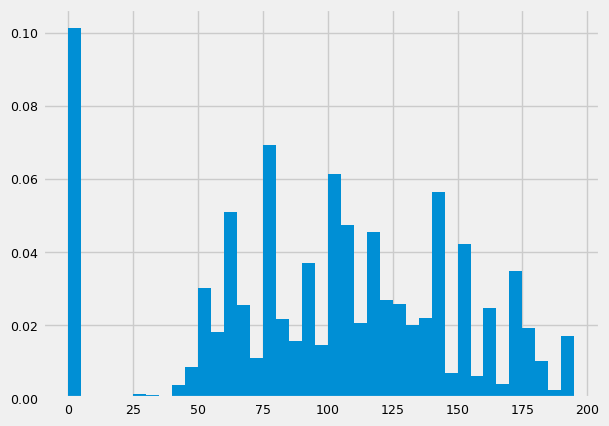

In [22]:
# the histogram shows that there are very few cars with less than 40 ps
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.rcParams['font.size'] = 9

hp = autos[autos['power_ps'] < 200]['power_ps']
plt.hist(hp, weights=np.ones(len(hp))/len(autos), bins=np.arange(0, 200, 5))

plt.show()


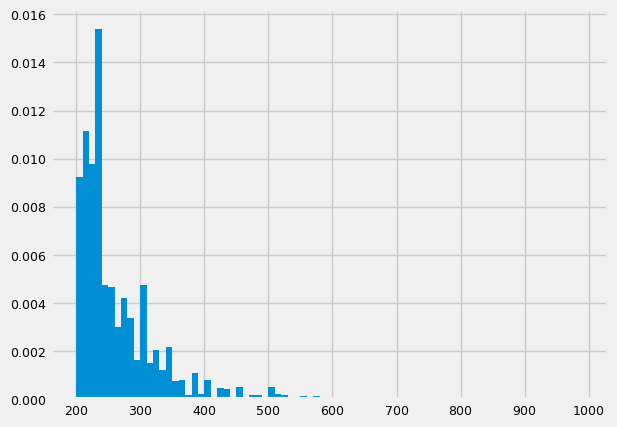

In [23]:
# the histogram shows that there are very few cars with more than 600 hp
import matplotlib.pyplot as plt

hp = autos[autos['power_ps'] > 200]['power_ps']
plt.hist(hp, weights=np.ones(len(hp))/len(autos), bins=np.arange(200, 1000, 10))
plt.show()


In [24]:
# we remove cars with extreme hp values that are not representative
autos = autos.query("power_ps > 40 and power_ps <= 600")

In [25]:
# registration year becomes continuoys from 1910
autos['registration_year'].value_counts().sort_index().head(20)

1000     1
1500     1
1800     1
1910     4
1923     1
1931     1
1936     2
1937     2
1941     2
1942     1
1943     2
1945     3
1947     2
1948     2
1949     2
1950     6
1951    10
1952     3
1953     4
1954     5
Name: registration_year, dtype: int64

In [28]:
# the latest registration_year value should be 2016
print(pd.to_datetime(autos['date_created']).max())
autos['registration_year'].value_counts().sort_index(ascending=False).head(20)

2016-04-07 00:00:00


9999        1
9000        1
8200        1
6000        2
5911        1
5000        5
4500        1
4000        1
2019       10
2018     1935
2017     5031
2016     4419
2015     1847
2014     3074
2013     4006
2012     6079
2011     7802
2010     7949
2009     9994
2008    10055
Name: registration_year, dtype: int64

In [30]:
autos = autos.query("registration_year >= 1910 and registration_year <= 2016")

<br>

<br>

### Task 6 - Exploring price by brand
1. Explore the unique values in the brand column, and decide on which brands you want to aggregate by.
    - You might want to select the top 20, or you might want to select those that have over a certain percentage of the total values (e.g. > 5%).
    - Remember that `Series.value_counts()` produces a series with index labels, so you can use Series.index attribute to access the labels, should you wish.
2. Create an empty dictionary to hold your aggregate data.
    - Loop over your selected brands, and assign the mean price to the dictionary, with the brand name as the key.
    - Print your dictionary of aggregate data, and write a paragraph analyzing the results.
    - You can easily convert the dictionary to a pandas Series with the `pd.Series()` constructor. Convert the dictionary to a pandas series and display the series.

<br>


In [33]:
top10 = autos['brand'].value_counts()[:10].index

top10_price = {}
for brand in top10:
    brand_data = autos[autos['brand'] == brand]
    brand_median_price = brand_data['price'].mean()
    top10_price[brand] = brand_median_price
    
pd.Series(top10_price)

volkswagen       5608.743526
bmw              8619.254024
opel             3154.542911
mercedes_benz    8798.683512
audi             9350.024117
ford             3884.144285
renault          2618.470107
peugeot          3376.468345
fiat             3067.946077
seat             4735.003090
dtype: float64

<br>

### Task 7 - Exploring mileage

Let us apply the same steps from the previous task to create a dataframe with the mean price and mileage for each brand.

1. Create two dictionaries for the mileage and price
2. Loop over the brands names, filter the data for each brand, calculate the mean price and milage and add means to the dictionaries.
3. Convert the dictionaries to pandas series
4. Create a dataframe using the series for the mean prices
5. Add a new column using the mean mileage values

In [34]:
top10 = autos['brand'].value_counts()[:10].index

top10_mileage = {}
top10_price = {}

for brand in top10:
    brand_data = autos[autos['brand'] == brand]
    brand_mean_price = brand_data['price'].mean()
    brand_mileage = brand_data['odometer_km'].mean()
    top10_mileage[brand] = brand_mileage
    top10_price[brand] = brand_mean_price
    
top10_price_series = pd.Series(top10_price)
top10_mileage_series = pd.Series(top10_mileage)

top10_df = pd.DataFrame(data=top10_price_series, 
                        columns=['price'])

top10_df['mileage'] = top10_mileage_series
top10_df['ppm'] = top10_df['price']  / top10_df['mileage']
top10_df.sort_values(by='price', ascending=False)

,price,mileage,ppm
audi,9350.024117,129192.090678,0.072373
mercedes_benz,8798.683512,130775.895357,0.067281
bmw,8619.254024,133295.707800,0.064663
volkswagen,5608.743526,128359.316524,0.043696
seat,4735.003090,120670.311386,0.039239
ford,3884.144285,124126.266404,0.031292
peugeot,3376.468345,124484.249537,0.027124
opel,3154.542911,128607.255798,0.024528
fiat,3067.946077,117103.367724,0.026199
renault,2618.470107,127278.487481,0.020573
